In [181]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### 2D Temperature Heat Map (Blowtorch at Center)

Create a grid of points

In [182]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
X.shape
Y.shape

(100, 100)

(100, 100)

Define the temperature function: hottest at center, cooler further away

Formula: Z = 10 - (X^2 + Y^2)

In [183]:
Z = 10 - (X**2 + Y**2)
Z.shape

(100, 100)

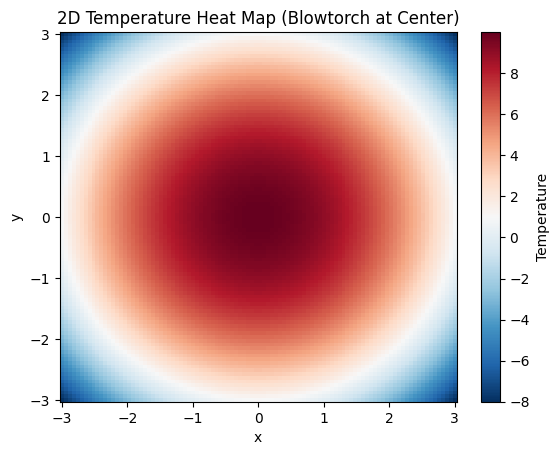

In [184]:
# cmap='RdBu_r': This selects a "Red to Blue" colormap. The _r suffix reverses it.
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='auto')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.title('2D Temperature Heat Map (Blowtorch at Center)')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

If you were to place an arrow (gradient vector) at any point on above plot, it would point directly toward the bright red center, as that is the direction of the "steepest increase" in temperature.

Next we are going to create a plot with gradient arrows.

### 2D Heat Map with Gradient Arrows

Create grid and temperature function

In [185]:
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = 10 - (X**2 + Y**2)

Calculate Gradient (Partial Derivatives)

- Partial Derivatives: The dx and dy represent the slopes along the x and y axes respectively. They measure how fast temperature changes in one direction while ignoring the other.

- The Gradient Vector: By combining dx and dy, we get the gradient vector (represented by the black arrows).

In [186]:
dy, dx = np.gradient(Z)
dy.shape
dx.shape

(20, 20)

(20, 20)

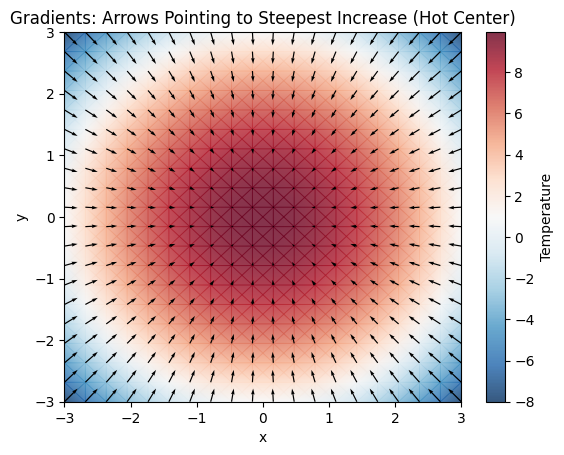

In [187]:
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='gouraud', alpha=0.8)
_ = plt.quiver(X, Y, dx, dy, color='black')  # Draw arrows pointing uphill
_ = plt.title('Gradients: Arrows Pointing to Steepest Increase (Hot Center)')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

### 3D "Temperature Hill"

In [188]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(x, y)
zz = 10 - (xx**2 + yy**2)

In [189]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz, colorscale='RdBu_r'
)])

fig.update_layout(
    title='3D Temperature Hill',
    scene=dict(
        xaxis_title='x', yaxis_title='y', zaxis_title='Temperature (Z)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800, height=600
)

### 3D Gaussian "Temperature Hill" (Flattens at Edges)

In [190]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

Gaussian Formula: z = A * exp(-(x^2 + y^2) / (2 * sigma^2))

This creates a "bump" that flattens out at the edges.

In [191]:
A = 10        # Peak height
sigma = 2.5   # Width of the hill
zz = A * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

In [192]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu_r', showscale=False
)])

fig.update_layout(
    title='Gaussian Temperature Hill (Flattens at Edges)',
    scene=dict(
        xaxis_title='x', yaxis_title='y', zaxis_title='Temperature (Z)',
        zaxis=dict(range=[0, 10]),  # Keep height consistent
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800, height=600
)

### Visualizing Gradient Descent (For a model with 1 parameter)

y = β1x + β0 (y = mx + b)

β0: intercept (assume it to be zero, line passing through origin)  
β1: slope

We need to develop a regression model.

It simply means finding out the slope (β1). We only have a single parameter here.

In [193]:
x = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 0.9])
y = np.array([0.1, 0.15, 0.4, 0.55, 0.8, 1.2, 1.5, 1.7])
n = len(x)

**The model parameter 'm' decides the cost of the model**

In [194]:
# These are the possible 'm' (slope) values for which we will measure the cost
m_values = np.arange(0, 2.1, 0.2)  # start, stop, step
m_values
len(m_values)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

11

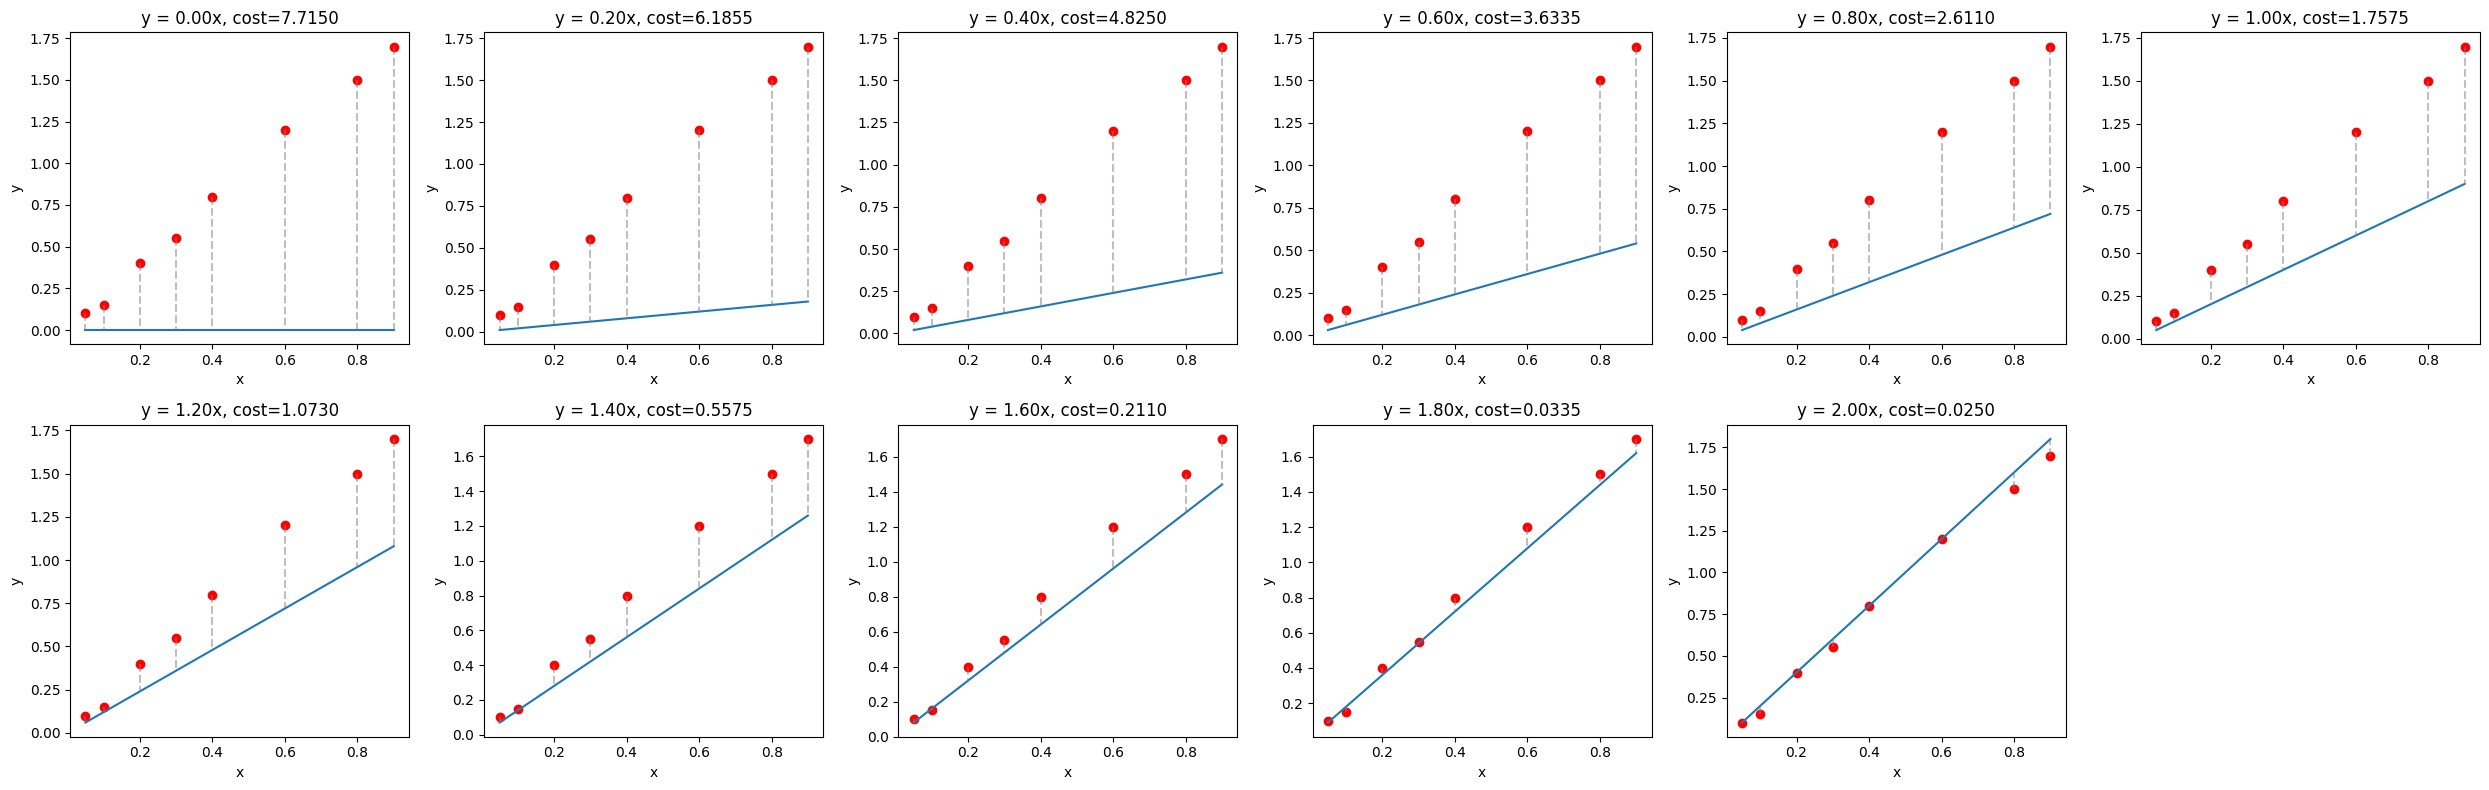

In [195]:
import math

n_plots = len(m_values)
n_cols = 6
n_rows = math.ceil(n_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4*n_rows))
axes = axes.flatten()

for idx, m in enumerate(m_values):
  y_pred = m * x  # Make predictions using Model
  cost = np.sum((y - y_pred) ** 2)  # SSR

  _ = axes[idx].scatter(x, y, color='red')
  _ = axes[idx].plot(x, y_pred)
  _ = axes[idx].vlines(x, y, y_pred, color='gray', linestyle='--', alpha=0.5)

  _ = axes[idx].set_title(f'y = {m:.2f}x, {cost=:.4f}')
  _ = axes[idx].set_xlabel('x')
  _ = axes[idx].set_ylabel('y')

for j in range(idx+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()

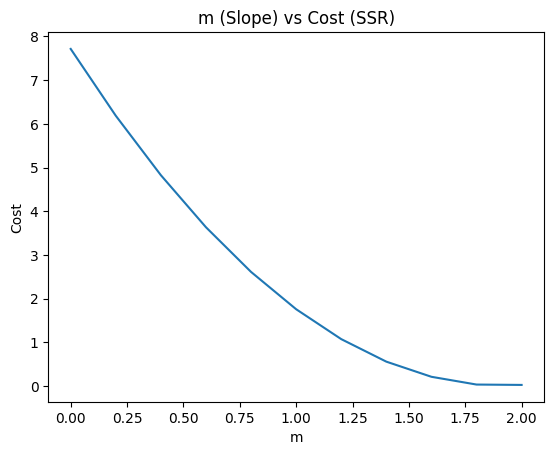

In [196]:
cost_values = [np.sum((y - m*x) ** 2) for m in m_values]  # SSR
_ = plt.plot(m_values, cost_values)
_ = plt.title('m (Slope) vs Cost (SSR)')
_ = plt.xlabel('m')
_ = plt.ylabel('Cost')

**Let's implement the gradient descent**

In [197]:
# J(β), where β = [β0, β1, ...]
# But to simplify (by having just 1 param in model), here cost is like J(β1), where β1 = slope
def cost(m):
  y_pred = m * x
  return np.sum((y_pred - y) ** 2)  # SSR

In [198]:
# ∇J(β) -> Vector of partial derivatives
def grad(m):
  return 2 * np.sum(x * (m*x - y))  # A scalar value in this case

In [204]:
m = 0  # Model parameter
epochs = 10  # How many iterations
alpha = 0.5  # Learning rate
history = [(m, cost(m))]

for _ in range(epochs):
  # GD Update Rule: beta_new = beta_old - alpha * grad
  # In this case: m_new = m_old - alpha * grad
  m -= alpha * grad(m)
  history.append((m, cost(m)))

history = np.array(history)
history[-1]

array([-3.63679844, 65.00452837])

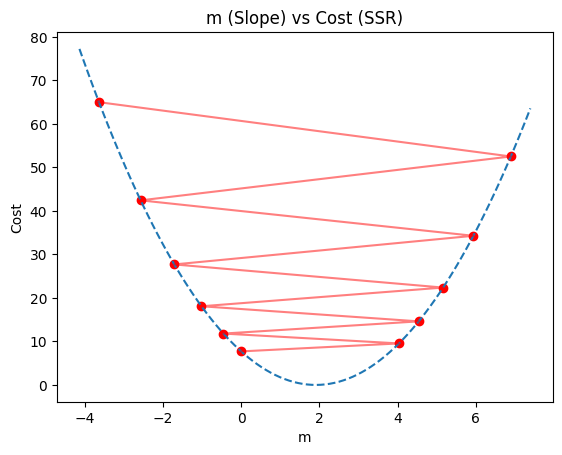

In [205]:
# Create a range of m values slightly wider than our history to show the full curve
m_values = np.linspace(min(history[:, 0]) - 0.5, max(history[:, 0]) + 0.5, 100)
cost_values = [np.sum((y - m*x) ** 2) for m in m_values]

_ = plt.plot(m_values, cost_values, linestyle='--', label='Cost Curve')
_ = plt.scatter(history[:, 0], history[:, 1], color='red', label='Current Step')
_ = plt.plot(history[:, 0], history[:, 1], color='red', alpha=0.5)  # Path of red dots
_ = plt.title('m (Slope) vs Cost (SSR)')
_ = plt.xlabel('m')
_ = plt.ylabel('Cost')

**Create Plotly Animation**

In [206]:
fig = go.Figure()

# Trace 0: Static Cost Curve
_ = fig.add_trace(go.Scatter(x=m_values, y=cost_values, mode='lines',
                             line=dict(color='blue', dash='dash'), name='Cost Curve'))

# Trace 1: The Path Line (starts empty)
_ = fig.add_trace(go.Scatter(x=[], y=[], mode='lines',
                             line=dict(color='rgba(255, 0, 0, 0.5)', width=2), name='Path'))

# Trace 2: The Moving Ball
_ = fig.add_trace(go.Scatter(x=[history[0, 0]], y=[history[0, 1]], mode='markers',
                             marker=dict(size=12, color='red'), name='Current Step'))

# Update Frames to include the path AND the ball
fig.frames = [go.Frame(
    data=[
        # Update Trace 1 (Path): all points up to idx
        go.Scatter(x=history[:idx+1, 0], y=history[:idx+1, 1]),
        # Update Trace 2 (Ball): only the current point
        go.Scatter(x=[row[0]], y=[row[1]])
    ],
    traces=[1, 2],  # Update both Path and Ball
    name=str(idx)
) for idx, row in enumerate(history)]

fig.update_layout(
    title='Gradient Descent Visualization',
    xaxis_title='m (Slope)',
    yaxis_title='Cost (SSR)',

    width=900,
    height=600,
    yaxis=dict(range=[history[:, 1].min() - 1, history[:, 1].max() + 1]),
    xaxis=dict(range=[history[:, 0].min() - 0.5, history[:, 0].max() + 0.5]),

    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[
            # Play Button
            dict(label='Play',
                 method='animate',
                 args=[None, dict(frame=dict(duration=500, redraw=False), fromcurrent=True)]),

            # Reset Button
            dict(label='Reset',
                 method='animate',
                 args=[[str(0)], dict(frame=dict(duration=0, redraw=False), mode='immediate')])
        ]
    )]
)

No, the ball is not guaranteed to float downward. While the gradient points toward the valley, the Learning Rate ($\alpha$) determines the size of the step. If that step is too large, the ball doesn't just "bounce"; it overshoots the bottom so violently that it lands even higher up on the opposite wall.

Gradient Descent is only "downhill" if your steps are small enough to respect the curvature of the hill.